### Calcul DFT-TDDFT et CASSCF sur la molecule BODIPY afin  de determiner l'enegie de l'etat fondamental avec la DFT et les etats exités respectivement avec ma TDDFT et le CASSCF

In [1]:
from rdkit import Chem
from pathlib import Path 
import rdkit

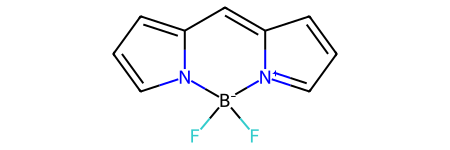

In [2]:
smile = '[B-]1(n2cccc2C=C3[N+]1=CC=C3)(F)F'
smi_key='BODIPY'
mol_rdkit = Chem.MolFromSmiles(smile)
mol_rdkit

In [3]:
import py3Dmol 

In [4]:
# Verify if the "data2402_{smi_key}" subdirectory exist and if not, create it
working_dir = Path(f'./data2407/{smi_key}')
# Create the output directory if it doesn't exist
working_dir.mkdir(parents=True, exist_ok=True)


In [5]:

def view3D(mol, label, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)       # visualiser la molécule avec une largeur de ''400'' et hauteur de ''400''

        if fmt=='mol':                                   # si le format des 'mol',
            view.addModel(Chem.MolToMolBlock(mol), fmt)     # generer les coordonnes de a molecule dans un block
            # view.addModel(mol, fmt)
        elif fmt=='xyz':                                      # sinon 
            view.addModel(mol, fmt)                             # generer les coordonnes en xyz

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})     # définir le style de représentation de la molécule, avec des bâtons pour les liaisons et des sphères pour les atomes avec une échelle de '30'
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}}) # ajouter une etiquette de visualisation dont les coordonnées sont x,y,z

        view.zoomTo()
        view.show()

### Meilleur conformere

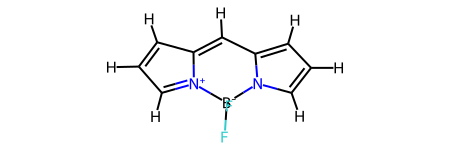

In [6]:
from rdkit.Chem import AllChem

# Add explicit Hs
mol_rdkit = Chem.AddHs(mol_rdkit)    #   Ajouter les atomes d'hydrogene a la molécule

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkit)
mol_rdkit

### Visualisation 3D

In [7]:
# 3D visualization
mol_rdkit0 = mol_rdkit                    #crée une nouvelle variable mol_rdkit0 qui est une copie de mol_rdkit.
                                           #Cette copie est nécessaire pour la visualisation 3D, car la fonction view3D() modifie l'objet molécule passé en argument.

view3D(mol_rdkit0, f'{smi_key} RDKit Molecule')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
# Convert RDKit molecule to XYZ format 
mol_xyz0 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
print(mol_xyz0)

21

B      0.077540   -1.260063    0.662168
N      1.287298   -0.512080    0.167762
C      2.610063   -0.872251    0.256071
C      3.376476    0.106602   -0.326730
C      2.477341    1.052924   -0.761252
C      1.191909    0.660042   -0.450475
C     -0.110072    1.302633   -0.691166
C     -1.226323    0.718760   -0.291707
N     -1.210933   -0.517100    0.366848
C     -2.465701   -0.871538    0.654737
C     -3.367151    0.157580    0.176219
C     -2.649449    1.109206   -0.388242
F      0.167736   -1.384240    2.127318
F     -0.008884   -2.602113    0.071666
H      2.928855   -1.787844    0.719808
H      4.459867    0.107265   -0.412239
H      2.746806    1.974054   -1.274174
H     -0.159997    2.257776   -1.197146
H     -2.712431   -1.798886    1.169208
H     -4.447832    0.134476    0.273536
H     -2.965119    2.024799   -0.852211



### Préoptimisation avec RDKIT 
#### Visualisation 3D

In [9]:
from rdkit.Chem import AllChem

# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")   # utiliser 200 itérations et la variante MMFF94s

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

# 3D visualization
mol_rdkit1 = mol_rdkit
view3D(mol_rdkit1, f'{smi_key} RDKit Molecule MMFF94')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [10]:
# Convert RDKit molecule to XYZ format 
mol_xyz1 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
# Remove the first two lines (number of atoms and empty line) from XYZ data
with open("mol_rdkit.xyz","w") as f:
    f.write(mol_xyz1 )

print(mol_xyz1)

21

B      0.049624   -1.424690   -0.005782
N      1.279829   -0.556346   -0.004803
C      2.598348   -0.942006   -0.005486
C      3.389120    0.180438   -0.004106
C      2.508712    1.237631   -0.002592
C      1.210629    0.770453   -0.003037
C     -0.080670    1.476539   -0.001916
C     -1.213388    0.795776   -0.002648
N     -1.225861   -0.604625   -0.004497
C     -2.492325   -1.027731   -0.004848
C     -3.373187    0.123249   -0.003190
C     -2.631883    1.214016   -0.001867
F      0.038478   -2.225805    1.230467
F      0.024962   -2.328667   -1.163140
H      2.897402   -1.974265   -0.006886
H      4.475710    0.199649   -0.004224
H      2.799770    2.286184   -0.001242
H     -0.109171    2.558201   -0.000482
H     -2.760723   -2.082952   -0.006196
H     -4.457569    0.078630   -0.003069
H     -2.927806    2.246321   -0.000455



### optimisation avec  et crest

In [11]:
import subprocess as sp # pour exécuter les processus externes (ici xtb et crest)

# Setting various paths for xtb files
path_xtb_xyz = working_dir / f'{smi_key}_opt.xyz'
path_xtb_log = working_dir / f'{smi_key}_opt.log'

In [12]:
%%bash
# sp.run(["xtb","mol_rdkit.xyz", "--gfn 2 --opt vtight", "--parallel 4"], 
#         stdout=sp.PIPE, stderr=sp.PIPE, text=True, universal_newlines=True)
xtb mol_rdkit.xyz --gfn 2 --opt vtight --parallel 4

      -----------------------------------------------------------      
     |                   =====================                   |     
     |                           x T B                           |     
     |                   =====================                   |     
     |                         S. Grimme                         |     
     |          Mulliken Center for Theoretical Chemistry        |     
     |                    University of Bonn                     |     
      -----------------------------------------------------------      

   * xtb version 6.6.1 (8d0f1dd) compiled by 'conda@1efc2f54142f' on 2023-08-01

   xtb is free software: you can redistribute it and/or modify it under
   the terms of the GNU Lesser General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.
   
   xtb is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; w

   9    -40.0206899 -0.592164E-07  0.141E-03    1.64      15.5  T
  10    -40.0206899 -0.129862E-07  0.614E-04    1.64      35.6  T
  11    -40.0206899 -0.201300E-08  0.240E-04    1.64      91.0  T

   *** convergence criteria satisfied after 11 iterations ***

         #    Occupation            Energy/Eh            Energy/eV
      -------------------------------------------------------------
         1        2.0000           -0.7450642             -20.2742
       ...           ...                  ...                  ...
        29        2.0000           -0.4483512             -12.2003
        30        2.0000           -0.4364798             -11.8772
        31        2.0000           -0.4329111             -11.7801
        32        2.0000           -0.4312802             -11.7357
        33        2.0000           -0.4273842             -11.6297
        34        2.0000           -0.4172762             -11.3547
        35        2.0000           -0.3988617             -10.8536 

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Meilleure conformation avec crest

In [13]:
#%%bash
# sp.run(['crest', 'xtbopt.xyz', '-gff -mquick --noreftopo'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
!crest xtbopt.xyz -gff -mquick --noreftopo

 
       ╔════════════════════════════════════════════╗
       ║            ___ ___ ___ ___ _____           ║
       ║           / __| _ \ __/ __|_   _|          ║
       ║          | (__|   / _|\__ \ | |            ║
       ║           \___|_|_\___|___/ |_|            ║
       ║                                            ║
       ║  Conformer-Rotamer Ensemble Sampling Tool  ║
       ║          based on the xTB methods          ║
       ║                                            ║
       ╚════════════════════════════════════════════╝
       Version 3.0.1, Mon May  6 18:43:33 UTC 2024
       commit (1782d7d) compiled by 'runner@fv-az772-53'
 
   Cite work conducted with this code as

   • P.Pracht, F.Bohle, S.Grimme, PCCP, 2020, 22, 7169-7192.
   • S.Grimme, JCTC, 2019, 15, 2847-2862.
   • P.Pracht, S.Grimme, C.Bannwarth, F.Bohle, S.Ehlert,
     G.Feldmann, J.Gorges, M.Müller, T.Neudecker, C.Plett,
     S.Spicher, P.Steinbach, P.Wesołowski, F.Zeller,
     J. Chem. Phys., 2024, 160, 11

 Geometry successfully optimized.
 
          ┍━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
          │              CREST iMTD-GC SAMPLING             │
          ┕━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┙
 
 Input structure:
  21
 
 B          0.0000027813       -1.1031240506        0.0003140363
 N          1.2478752651       -0.2129502515       -0.0013958608
 C          2.5106867098       -0.6562038739       -0.0037015592
 C          3.3338585800        0.4781285647       -0.0028954182
 C          2.5357420234        1.6107336485        0.0000064963
 C          1.1856515787        1.1865959933        0.0009111522
 C         -0.0000129115        1.8999169927        0.0023505052
 C         -1.1856699075        1.1865850888        0.0009004160
 N         -1.2478826267       -0.2129629215       -0.0013701929
 C         -2.5106906193       -0.6562260828       -0.0036512779
 C         -3.3338715547        0.4781006464       -0.0028727431
 C         -2.5357637246        1.61

Optimisation de la meilleure conformation crest

In [14]:
#%%bash
# xtb_process = sp.run(["xtb", 'crest_best.xyz', "--gfn 2 --opt vtight", "--parallel 4"],
#                     stdout=sp.PIPE, stderr=sp.PIPE, text=True, universal_newlines=True)
!xtb crest_best.xyz --gfn 2 --opt vtight --parallel 4 > xtbopt2.out

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


In [15]:
with open("xtbopt.xyz","r") as f:
    line=f.readlines()
mol_xtb = '\n'.join(line[2:])
print(mol_xtb)

B           -0.00003937948918       -1.16291969915447       -0.00423587443888

N            1.24628758171339       -0.24087356618919       -0.00405395340818

C            2.51745540160363       -0.61912895253640       -0.00636277878329

C            3.35669201865288        0.50458947427877       -0.00515971632671

C            2.54032558576596        1.61200478099003       -0.00186665737564

C            1.20543141740764        1.13830704994384       -0.00130937244509

C            0.00011153309530        1.82108406641687        0.00038278255849

C           -1.20528135622234        1.13842416124320       -0.00138274904485

N           -1.24627453827997       -0.24074969528341       -0.00411447289452

C           -2.51748231188256       -0.61888113134135       -0.00648424757231

C           -3.35660474531941        0.50491968373479       -0.00532705708381

C           -2.54012495119820        1.61225567428974       -0.00201946111859

F           -0.00010616907859       -1.9497387942122

### Creation de l'objet pyscf

In [16]:
from pyscf import gto, scf, dft, tddft, sgx, solvent
from qiskit_nature.second_q.drivers import PySCFDriver, MethodType
import dftd4.pyscf as disp
import time


# Renseigner la structure de la molécule
Thiazole_driver = PySCFDriver(
    atom=mol_xtb ,  # Coordonnées xyz Thiazole
    basis="3-21g",  # Ensemble de base
    method=MethodType.RKS  # Spécifier RKS ici
)
# Measure execution time.
start = time.time()

Thiazole_driver.run_pyscf()
mol = Thiazole_driver._mol
mf = Thiazole_driver._calc

# Configuration du calcul DFT
mf.xc = 'B3LYP'
mf = mf.run().ddCOSMO()
mf.with_solvent.eps = 2.3741  # Toluene
mf = disp.energy(mf).run()

end = time.time()
mf_times=end-start

/home/fortune/anaconda3/lib/python3.11/site-packages/pyscf/dft/libxc.py:1110: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [17]:

mf.mo_occ

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [18]:
n_lumo = mol.nao
n_homo = n_lumo - 1
print(f"indice homo : {n_homo} ")
print(f"indice lumo: {n_lumo} ")


indice homo : 139 
indice lumo: 140 


In [19]:
# quelques variables utiles
total_number_particle = mol.nelec
total_num_electrons = mol.nelectron
total_num_spatial_orbitals = mf.mo_coeff.shape[1]
print(f'le nombre total de particule est:',{total_number_particle})
print(f'le nombre total electrons est:',{total_num_electrons})
print(f'le nombre orbitale spatiale est:',{total_num_spatial_orbitals})

le nombre total de particule est: {(49, 49)}
le nombre total electrons est: {98}
le nombre orbitale spatiale est: {140}


Calcul TDDFT

In [20]:
# Etat singulet
import time

start = time.time()

mfdft = tddft.TDDFT(mf)
mfdft.nstates = 4
e_tddft, _ = mfdft.kernel()
end = time.time()
mfdft_times=end-start
print(mfdft_times)
print(f"Énergies des 4 premiers états excités TDDFT :")
for i, energy in enumerate(e_tddft):
    print(f"État {i+1} : {energy:0.6f} eV")

565.7511134147644
Énergies des 4 premiers états excités TDDFT :
État 1 : 0.031645 eV
État 2 : 0.112852 eV
État 3 : 0.123412 eV
État 4 : 0.140451 eV


In [21]:
ee_singlets = mfdft.e
print(ee_singlets)

[0.0316448  0.11285202 0.12341199 0.14045083]


In [22]:
# Etat triplet
mfdft.singlet = False

start = time.time()

mfdft3 = tddft.TDDFT(mf)
mfdft3.nstates = 4
e_tddft3, _ = mfdft3.kernel()
end = time.time()
mfdft_times3=end-start
print(mfdft_times3)
print(f"Énergies des 4 premiers états excités triplets TDDFT :")
for i, energy in enumerate(e_tddft):
    print(f"État {i+1} : {energy:0.6f} eV")

542.5780167579651
Énergies des 4 premiers états excités triplets TDDFT :
État 1 : 0.031645 eV
État 2 : 0.112852 eV
État 3 : 0.123412 eV
État 4 : 0.140451 eV


In [23]:
 ee_triplets = mfdft3.e
 print(ee_triplets)

[0.02731066 0.09427193 0.12341199 0.14045083]


### selection de l'espace actif

In [24]:
import numpy as np
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
transformer = ActiveSpaceTransformer(2, 2)  

In [25]:
# Determine active space
as_orbitals = transformer._determine_active_space(total_num_electrons, total_num_spatial_orbitals)
as_orbitals[0]

[48, 49]

### Calcul CASSCF a partir d'un mf DFT

In [29]:
 from pyscf import scf, mcscf
 
# determine l'espace actif
active_electrons, active_orbitals = as_orbitals[0]

# Configuration du calcul CASSCF pour les états excités singulets
n_states = 5  # Nombre d'états (1 état fondamental + 4 états excités)
casscf_singlet = mcscf.CASSCF(mf, active_orbitals, active_electrons).state_average([1.0/n_states]*n_states)

# Effectuer le calcul CASSCF pour les singulets
casscf_singlet.kernel()

# Récupérer les énergies des états singulets
energies_singlet = casscf_singlet.e_states

# Afficher les énergies des quatre premiers états excités singulets
print("Énergies des états excités singulets :")
for i in range(1, n_states):
    print(f"Énergie de l'état excité singulet {i}: {energies_singlet[i]} Hartree")

# Configuration du calcul CASSCF pour les états excités triplets
casscf_triplet = mcscf.CASSCF(mf, active_orbitals, active_electrons).state_average([1.0/n_states]*n_states)
casscf_triplet.fcisolver.wfnsym = '3'  # Spécifier le triplet

# Effectuer le calcul CASSCF pour les triplets
casscf_triplet.kernel()

# Récupérer les énergies des états triplets
energies_triplet = casscf_triplet.e_states

# Afficher les énergies des quatre premiers états excités triplets
print("Énergies des états excités triplets :")
for i in range(1, n_states):
    print(f"Énergie de l'état excité triplet {i}: {energies_triplet[i]} Hartree")

In [81]:
# # Configuration du calcul CASSCF pour les états excités
# n_states = 5  # Nombre d'états (1 état fondamental + 4 états excités)
# casscf = mcscf.CASSCF(mf, 4, 4).state_average([1.0/n_states]*n_states)  # Ajustez les arguments en fonction du système

# # Effectuer le calcul CASSCF
# casscf.kernel()

# # Récupérer les énergies des états
# energies = casscf.e_states

# # Afficher les énergies des quatre premiers états excités
# for i in range(1, n_states):
#     print(f"Énergie de l'état excité {i}: {energies[i]} Hartree")

Énergie de l'état excité 1: -673.7966031456184 Hartree
Énergie de l'état excité 2: -673.7376616213237 Hartree
Énergie de l'état excité 3: -673.7244904549044 Hartree
Énergie de l'état excité 4: -673.6894235469299 Hartree


In [83]:
# casscf.fcisolver.wfnsym = '3'  # Spécifier le triplet

# # Effectuer le calcul CASSCF
# casscf.kernel()

# # Récupérer les énergies des états
# energies = casscf.e_states

# # Afficher les énergies des quatre premiers états excités triplets
# for i in range(1, n_states):
#     print(f"Énergie de l'état excité triplet {i}: {energies[i]} Hartree")

Énergie de l'état excité triplet 1: -673.780628964119 Hartree
Énergie de l'état excité triplet 2: -673.6966456195071 Hartree
